In [1]:
#Configuracion inicial
#%matplotlib inline
import matplotlib.pyplot as plt #librería para graficas de python
import numpy # extiende las librerias de matemática de python
import pandas as pd #libreria para procesamiento de datos muy usada en la industria
import seaborn

seaborn.set_context(context='talk', font_scale=1.2)

/home/simon/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
data = pd.read_csv('caso2parte1.csv')

In [3]:
data

,run,type,module,name,attrname,attrvalue,vectime,vecvalue
0,General-0-20240513-03:04:06-6828,runattr,NaN,NaN,configname,General,NaN,NaN
1,General-0-20240513-03:04:06-6828,runattr,NaN,NaN,datetime,20240513-03:04:06,NaN,NaN
2,General-0-20240513-03:04:06-6828,runattr,NaN,NaN,datetimef,20240513-030406,NaN,NaN
3,General-0-20240513-03:04:06-6828,runattr,NaN,NaN,experiment,General,NaN,NaN
4,General-0-20240513-03:04:06-6828,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN
5,General-0-20240513-03:04:06-6828,runattr,NaN,NaN,iterationvars,NaN,NaN,NaN
6,General-0-20240513-03:04:06-6828,runattr,NaN,NaN,iterationvarsd,NaN,NaN,NaN
7,General-0-20240513-03:04:06-6828,runattr,NaN,NaN,iterationvarsf,NaN,NaN,NaN
8,General-0-20240513-03:04:06-6828,runattr,NaN,NaN,measurement,NaN,NaN,NaN
9,General-0-20240513-03:04:06-6828,runattr,NaN,NaN,network,Network,NaN,NaN


In [4]:
data.columns

Index(['run', 'type', 'module', 'name', 'attrname', 'attrvalue', 'vectime',
       'vecvalue'],
      dtype='object')

# Limpieza de datos

## Las siguientes lineas las utilizamos para limpiar datos que nos sean de interes.

In [5]:
time_gen = data['vectime'].loc[[24]].tolist()
buffer_gen = data['vecvalue'].loc[[24]].tolist()

time_queue = data['vectime'].loc[[25]].tolist()
buffer_queue = data['vecvalue'].loc[[25]].tolist()

time_sink = data['vectime'].loc[[26]].tolist()
buffer_sink = data['vecvalue'].loc[[26]].tolist()

delay_time = data['vectime'].loc[[27]].tolist()
delay = data['vecvalue'].loc[[27]].tolist()

total_pkt_lost_time = data['vectime'].loc[[29]].tolist()
total_pkt_lost = data['vecvalue'].loc[[29]].tolist()

In [6]:
time_gen = list(map(float,time_gen[0].split()))
time_queue = list(map(float,time_queue[0].split()))

time_sink = list(map(float,time_sink[0].split()))
buffer_gen = list(map(float,buffer_gen[0].split()))

buffer_queue = list(map(float,buffer_queue[0].split()))
buffer_sink = list(map(float,buffer_sink[0].split()))

total_pkt_lost_time = list(map(float,total_pkt_lost_time[0].split()))
total_pkt_lost = list(map(float,total_pkt_lost[0].split()))

delay_time = list(map(float,delay_time[0].split()))
delay = list(map(float,delay[0].split()))

#print(total_pkt_lost)



<function matplotlib.pyplot.show(close=None, block=None)>

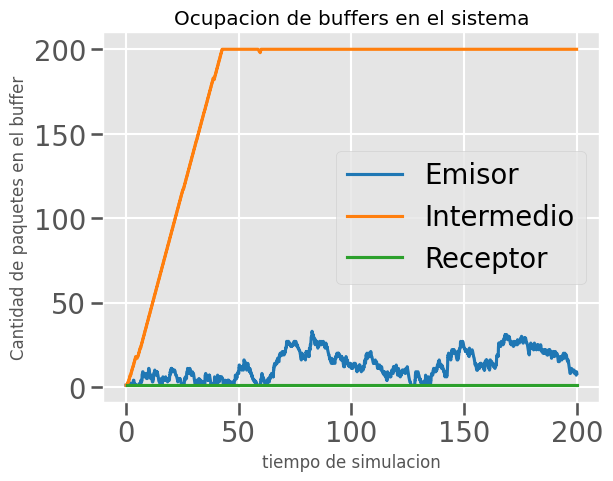

In [8]:
plt.plot(time_gen,buffer_gen, color='tab:blue', label="Emisor")
plt.plot(time_queue,buffer_queue, color='tab:orange', label="Intermedio")
plt.plot(time_sink,buffer_sink, color='tab:green', label="Receptor")
plt.title('Ocupacion de buffers en el sistema')
plt.xlabel("tiempo de simulacion")
plt.ylabel("Cantidad de paquetes en el buffer")
plt.legend()
plt.show

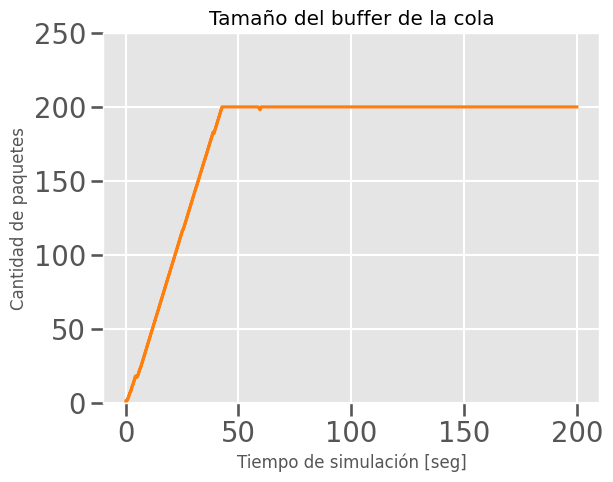

In [16]:
fig, ax = plt.subplots()

# Configuración
plt.title("Tamaño del buffer de la cola")
ax.set_xlabel("Tiempo de simulación [seg]")
ax.set_ylabel("Cantidad de paquetes")
plt.ylim([0, 250]) # Actualizo el rango de la y
plt.style.use("ggplot")  # ggplot
ax.plot(time_queue, buffer_queue, color='tab:orange')

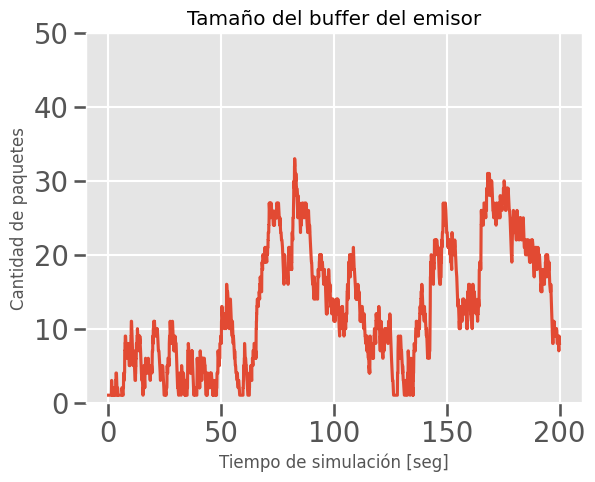

In [10]:
fig, ax = plt.subplots()

# Configuración
plt.title("Tamaño del buffer del emisor")
ax.set_xlabel("Tiempo de simulación [seg]")
ax.set_ylabel("Cantidad de paquetes")
plt.ylim([0, 50]) # Actualizo el rango de la y
plt.style.use("ggplot")  # ggplot
ax.plot(time_gen, buffer_gen)

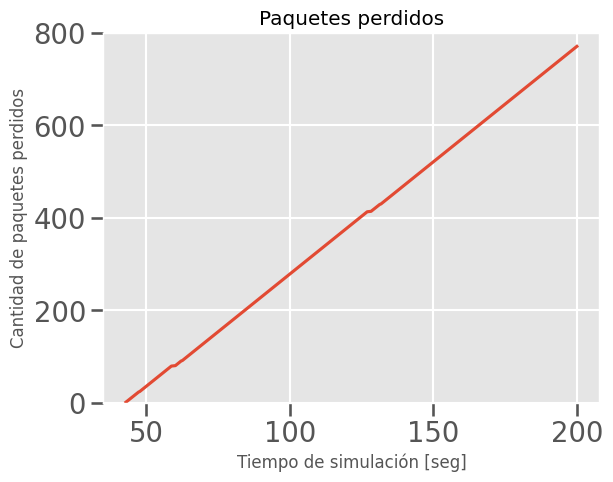

In [11]:
fig, ax = plt.subplots()

# Configuración
plt.title("Paquetes perdidos")
ax.set_xlabel("Tiempo de simulación [seg]")
ax.set_ylabel("Cantidad de paquetes perdidos")
plt.ylim([0, 800]) # Actualizo el rango de la y
plt.style.use("ggplot")  # ggplot
ax.plot(total_pkt_lost_time, total_pkt_lost)

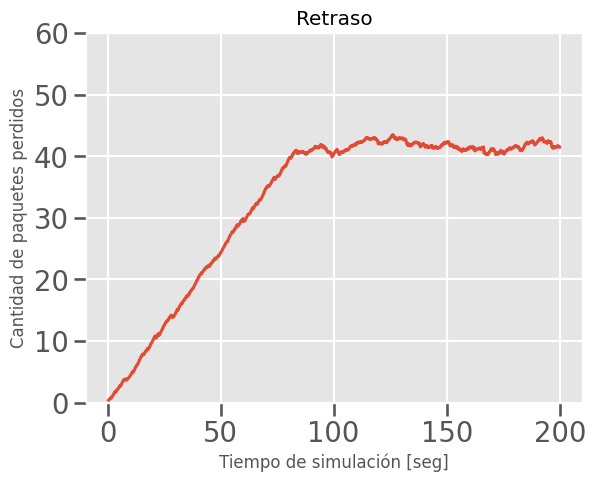

In [12]:
fig, ax = plt.subplots()

# Configuración
plt.title("Retraso")
ax.set_xlabel("Tiempo de simulación [seg]")
ax.set_ylabel("Cantidad de paquetes perdidos")
plt.ylim([0, 60]) # Actualizo el rango de la y
plt.style.use("ggplot")  # ggplot
ax.plot(delay_time, delay)

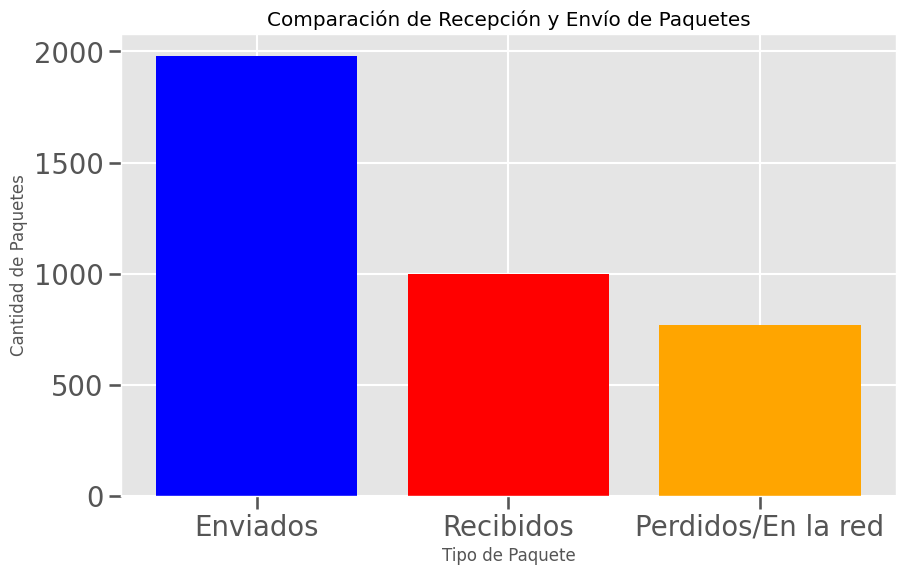

In [13]:
#Agregue en el modelo un contador de paquetes generados y paquetes consumidos
#sacando la info
time_gen = data['vectime'].loc[[23]].tolist()
packets_gen = data['vecvalue'].loc[[23]].tolist()
time_sink = data['vectime'].loc[[28]].tolist()
packets_sink = data['vecvalue'].loc[[28]].tolist()

#dividiendo en listas
time_gen = list(map(float,time_gen[0].split()))
packets_sink = list(map(float,packets_sink[0].split()))
time_sink = list(map(float,time_sink[0].split()))
packets_gen = list(map(float,packets_gen[0].split()))

# Contadores de paquetes
total_packets_gen = len(packets_gen)
total_packets_sink = len(packets_sink)

pkt_around = total_packets_gen - total_packets_sink

# Gráfica
plt.figure(figsize=(10, 6))

# Crear barras para paquetes generados y recibidos
plt.bar(['Enviados', 'Recibidos'], [total_packets_gen, total_packets_sink], color=['blue', 'red'])

# Crear una barra adicional para los paquetes perdidos
plt.bar('Perdidos/En la red', total_pkt_lost, color='orange')

plt.title("Comparación de Recepción y Envío de Paquetes")
plt.xlabel("Tipo de Paquete")
plt.ylabel("Cantidad de Paquetes")
plt.show()